In [4]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.reset_orig()

root_path = Path("../")
data_path = root_path / "data"
figures_path = Path("figures")

In [5]:
df = pd.DataFrame(
    {
        "x": np.random.choice(["a", "b", "c"], size=100, p=[0.25, 0.5, 0.25]),
        "y": np.random.choice(["a", "b", "c"], size=100, p=[0.1, 0.2, 0.7]),
    },
)
df.head()

,x,y
0,b,c
1,c,c
2,a,b
3,a,c
4,a,a


# Time Series Barplot

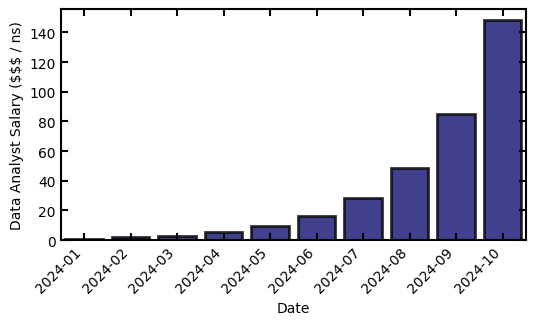

In [40]:
periods = 10
df = pd.DataFrame(
    {
        "date": pd.date_range(start="01-01-2024", periods=periods, freq="ME"),
        "value": np.exp(np.linspace(0, 5, periods)),
    },
)

df["date"] = df["date"].dt.to_period("M")


fig, ax = plt.subplots(figsize=(6, 3))

sns.barplot(x="date", y="value", data=df, ax=ax, edgecolor="k", color="navy", alpha=0.8, linewidth=2)

plt.xticks(rotation=45, ha="right")

for spine in ax.spines.values():
    spine.set_linewidth(1.5)

ax.spines["right"].set_visible(True)
ax.spines["top"].set_visible(True)

ax.tick_params(which="both", width=1.5, direction="in")
ax.tick_params(which="major", length=5)

ax.xaxis.set_ticks_position("both")
ax.yaxis.set_ticks_position("both")


ax.set_xlabel("Date")
ax.set_ylabel("Data Analyst Salary ($$$ / ns)")

fig.savefig(figures_path / "example_barplot_time_series.png", dpi=300, bbox_inches="tight")
fig.savefig(figures_path / "example_barplot_time_series.pdf", dpi=300, bbox_inches="tight")

plt.show()

# Comparison of categories

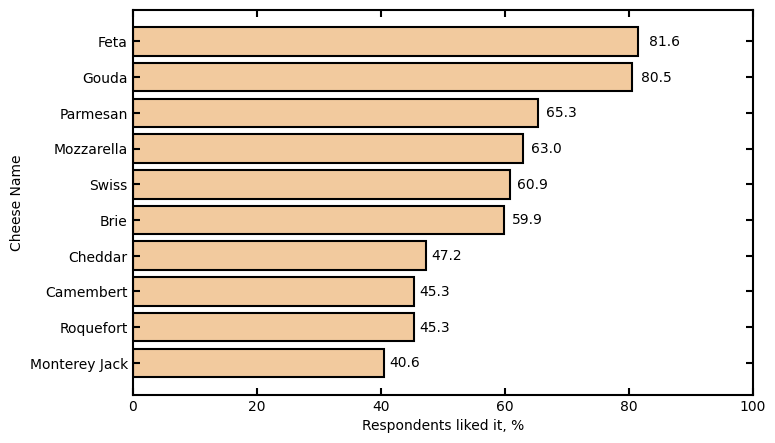

In [39]:
cheese_names = [
    "Brie",
    "Cheddar",
    "Mozzarella",
    "Gouda",
    "Roquefort",
    "Camembert",
    "Feta",
    "Parmesan",
    "Monterey Jack",
    "Swiss",
]

np.random.seed(42)
cheese_values = np.random.normal(50, 20, len(cheese_names))

cheese_values = np.clip(cheese_values, 0, 100)

cheese_dict = {cheese_names[i]: cheese_values[i] for i in range(len(cheese_names))}


fig, ax = plt.subplots(figsize=(8, 5))

sorted_cheese = sorted(cheese_dict.items(), key=lambda x: x[1], reverse=False)

names, values = zip(*sorted_cheese)
bars = plt.barh(names, values, edgecolor="k", color=(242 / 255, 202 / 255, 158 / 255), lw=1.5)

for bar in bars:
    ax.text(
        bar.get_width() * 1.02,
        bar.get_y() + bar.get_height() / 2,
        f"{bar.get_width():.1f}",
        ha="left",
        va="center",
    )

ax.set_xlim(0, 100)
plt.xlabel("Respondents liked it, %")
plt.ylabel("Cheese Name")

for spine in ax.spines.values():
    spine.set_linewidth(1.5)

ax.spines["right"].set_visible(True)
ax.spines["top"].set_visible(True)

ax.tick_params(which="both", width=1.5, direction="in")
ax.tick_params(which="major", length=5)

ax.xaxis.set_ticks_position("both")
ax.yaxis.set_ticks_position("both")

fig.savefig(figures_path / "example_barplot_categories.png", dpi=300, bbox_inches="tight")
fig.savefig(figures_path / "example_barplot_categories.pdf", dpi=300, bbox_inches="tight")

plt.show()